Importing the Dependencies

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

Data Collection and Processing

In [17]:
#loading and inserting dataframes
car_dataset=pd.read_csv("car data.csv")
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
#checking the no of rows and columns
car_dataset.shape

(301, 9)

In [19]:
#getting some information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [20]:
#checking the no of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

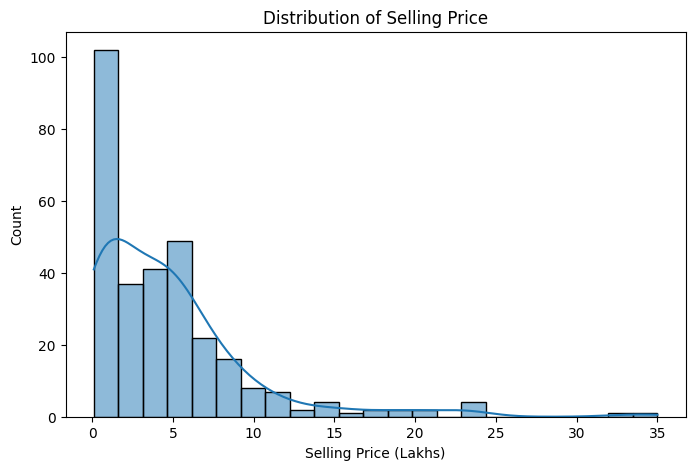

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(car_dataset['Selling_Price'], kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (Lakhs)")
plt.ylabel("Count")
plt.show()


In [22]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

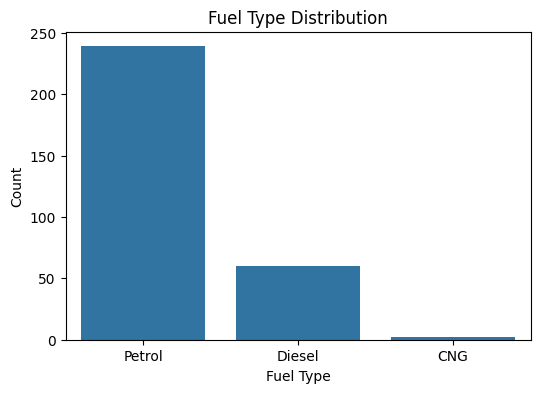

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Fuel_Type', data=car_dataset)
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()


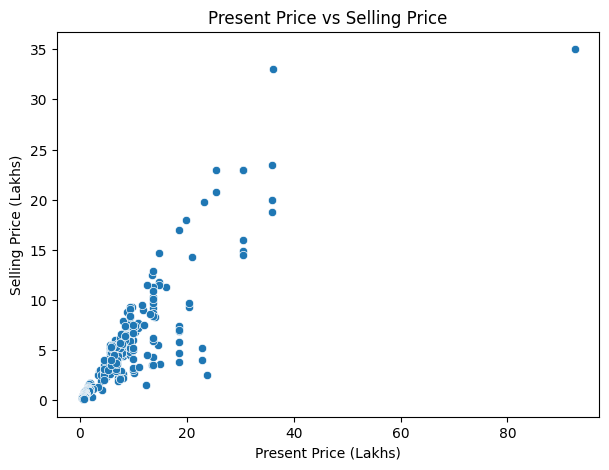

In [24]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=car_dataset)
plt.title("Present Price vs Selling Price")
plt.xlabel("Present Price (Lakhs)")
plt.ylabel("Selling Price (Lakhs)")
plt.show()


In [25]:
car_dataset.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

car_dataset.replace({"Seller_Type":{'Dealer':0,'Individual':1}},inplace=True)

car_dataset.replace({"Transmission":{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\Prachi\AppData\Local\Temp\ipykernel_11088\2990577864.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\Prachi\AppData\Local\Temp\ipykernel_11088\2990577864.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({"Seller_Type":{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\Prachi\AppData\Local\Temp\ipykernel_11088\2990577864.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed

In [26]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [27]:
numeric_df = car_dataset.select_dtypes(include=['int64', 'float64'])

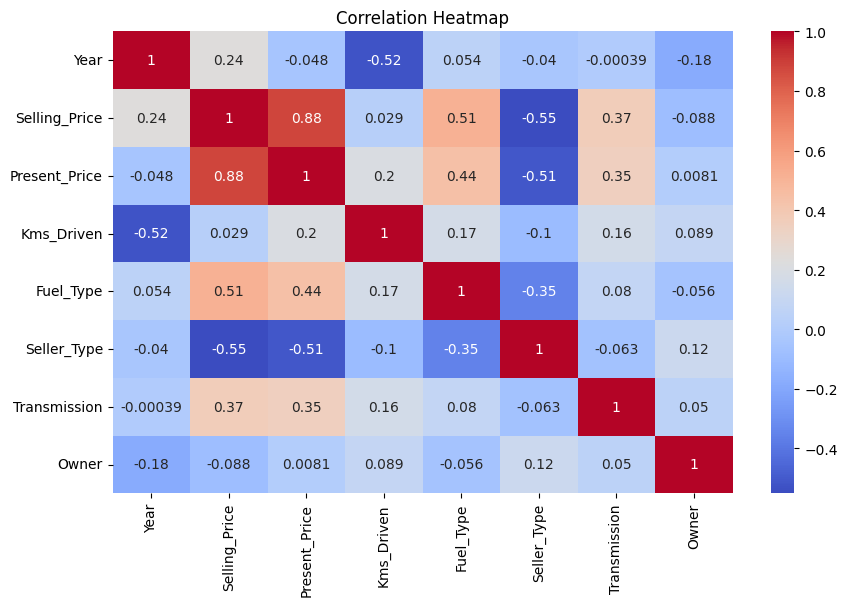

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Splitting the Data into Training and testing Data

In [29]:
x=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

Model Training

 Linear Regression

In [43]:
model=LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [46]:
#model accuracy
model.score(x_test,y_test)*100,model.score(x_train,y_train)*100

(85.91352720795979, 87.77782255367865)

In [47]:
#prediction on training data
predict=model.predict(x_train)

In [48]:
# R square error
error_score=metrics.r2_score(y_train,predict)
print("R squared error:", error_score)

R squared error: 0.8777782255367864


visualize the actual prices and predicted prices

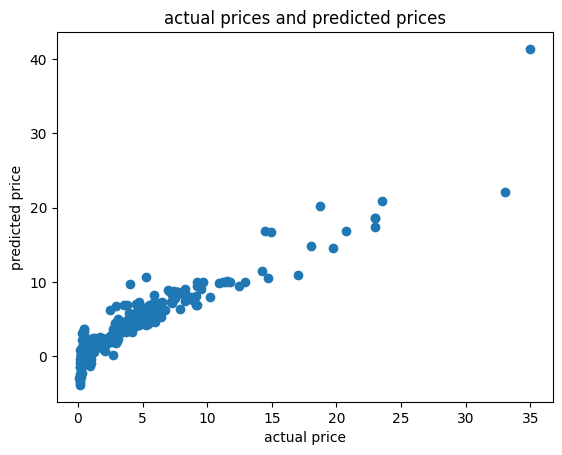

In [49]:
plt.scatter(y_train,predict)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual prices and predicted prices")
plt.show()

In [50]:
import pickle

In [51]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)